In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.linspace(1,4,10)
Y = np.exp(X)

In [15]:
X

array([1.        , 1.33333333, 1.66666667, 2.        , 2.33333333,
       2.66666667, 3.        , 3.33333333, 3.66666667, 4.        ])

In [4]:
def H(X):
    '''
    计算h
    '''
    N = len(X)
    h = np.array([])
    for j in range(N-1):
        h = np.append(h,(X[j+1]-X[j]))
    return h

In [5]:
def lamb(h):
    '''
    计算λ 1..N-1
    '''
    lam = np.array([])
    N = len(h)
    for j in range(N-1):
        j = j+1
        lam = np.append(lam,h[j]/(h[j-1]+h[j]))
    return lam

In [6]:
def mu_(lam):
    '''
    计算mu 1..N-1
    '''
    mu = 1-lam
    return mu

In [16]:
def D(Y,h):
    '''
    计算d 1...N-1
    '''
    d = np.array([])
    N = len(h)
    for j in (np.arange(N-1)):
        j = j+1
        dd = 6*((Y[j+1]-Y[j])/h[j]-(Y[j]-Y[j-1])/h[j-1])/(h[j-1]+h[j])
        d = np.append(d,dd)
    return d

In [8]:
def side_cond(Y,h,lam,mu,d,cond='one',dy0=None,dyN=None):
    if cond=='one':        
        ## 第一类边值条件
        lam0 = 1
        muN = 1
        d0 = 6/h[0]*((Y[1]-Y[0])/h[0]-dy0)
        dN = 6/h[-1]*(dyN-(Y[-1]-Y[-2])/h[-1])

        lam = np.insert(lam,0,lam0)
        mu = np.append(mu,muN)
        d = np.insert(d,0,d0)
        d = np.append(d,dN)
    elif cond=='natural':
        ## 自然边界条件
        lam0 = 0
        muN = 0
        d0 = 0
        dN = 0
        lam = np.insert(lam,0,lam0)
        mu = np.append(mu,muN)
        d = np.insert(d,0,d0)
        d = np.append(d,dN)
    elif cond=='two':
        ## 第二类边界条件
        lam0 = 0
        muN = 0
        d0 = 2*dy0
        dN = 2*dyN
        lam = np.insert(lam,0,lam0)
        mu = np.append(mu,muN)
        d = np.insert(d,0,d0)
        d = np.append(d,dN)
    return h,lam,mu,d

In [9]:
def gen_matrics(lam,mu):
    n = len(lam)
    A = np.eye(n+1)*2
    for i in range(n):
        A[i,i+1] = lam[i]
        A[i+1,i] = mu[i]
    return A

In [10]:
def gen_M(A,d):
    d = d.reshape(-1,1)
    M = np.linalg.inv(A)@d
    return M

In [11]:
def three_simple(xs,X,Y,cond='natural',dy0=None,dyN=None):
    low = np.argsort(X)
    X = X[low]
    Y = Y[low]
    h = H(X)
    lam = lamb(h)
    mu = mu_(lam)
    d = D(Y,h)
    h,lam,mu,d = side_cond(Y,h,lam,mu,d,cond,dy0,dyN)
    A = gen_matrics(lam,mu)
    M = gen_M(A,d)
    S = np.array([])
    for x in xs:
        for i,Xi in enumerate(X):
            if x<Xi:
                j = i
                break
        s = M[j-1]*(X[j]-x)**3/(6*h[j-1])+M[j]*(x-X[j-1])**3/(6*h[j-1])+\
        (Y[j-1]-M[j-1]*h[j-1]**2/6)*(X[j]-x)/h[j-1]+(Y[j]-M[j]*h[j-1]**2/6)*(x-X[j-1])/h[j-1]
        S = np.append(S,s)
    return S

In [24]:
x = np.linspace(1,4,50)
y = three_simple(x,X,Y,cond='natural',dy0=0,dyN=0)

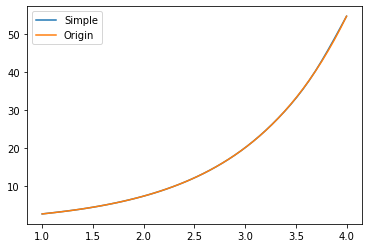

In [25]:
plt.plot(x,y,label='Simple')
plt.plot(x,np.exp(x),label='Origin')
plt.legend(loc='best')
plt.show()